In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hcluster 
from sklearn.cluster import AgglomerativeClustering

In [52]:
dataFrame=pd.read_csv('Mall_Customers.csv')

In [53]:
dataFrame.max()

CustomerID                 200
Gender                    Male
Age                         70
Annual Income (k$)         137
Spending Score (1-100)      99
dtype: object

In [54]:
dataFrame.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [55]:
dataFrame = dataFrame.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_score'})

In [56]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [57]:
#drop country column
#dataFrame=dataFrame.drop(['CustomerID'],axis=1)

In [58]:
dataFrame.shape

(200, 5)

In [59]:
dataFrame


,CustomerID,Gender,Age,Annual_Income,Spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Exploratory Data Analysis

In [60]:
dataFrame.describe()

,CustomerID,Age,Annual_Income,Spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [61]:
dataFrame.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_score    0
dtype: int64

<AxesSubplot:>

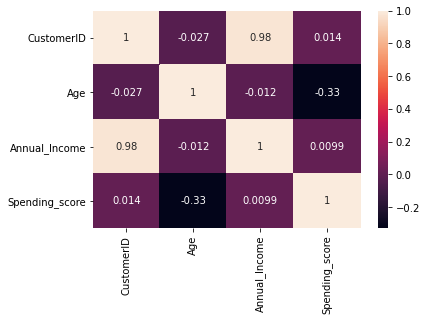

In [62]:
#correlation 
corr_matrix=dataFrame.corr()
sns.heatmap(corr_matrix,annot=True)

Text(0.5, 1.0, 'Spending_score')

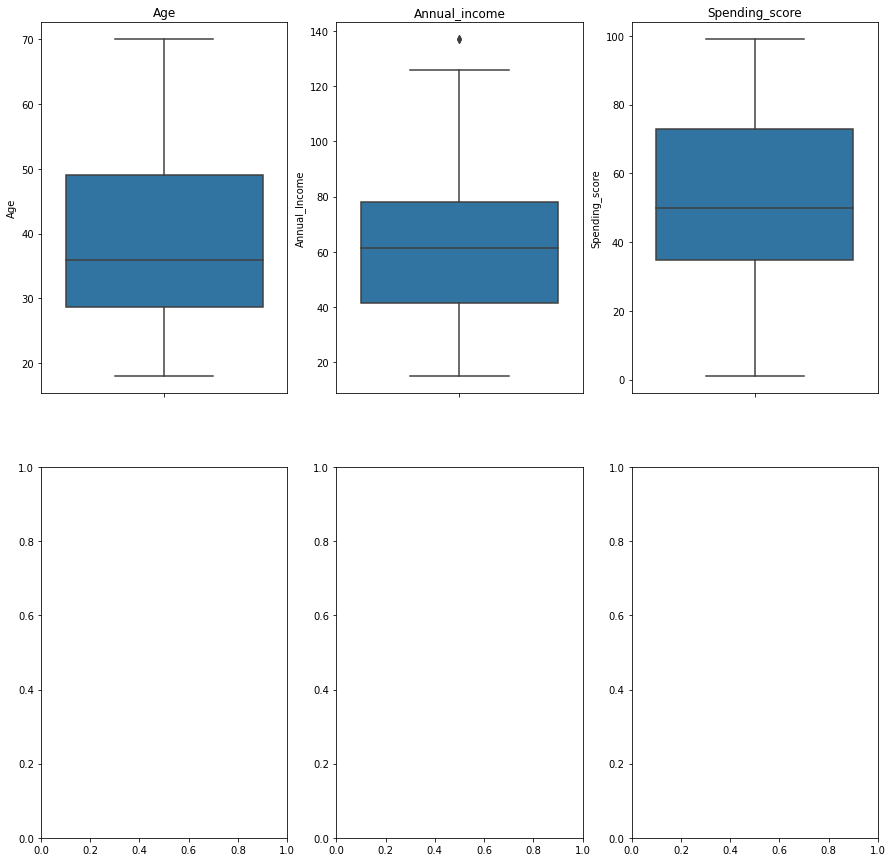

In [63]:
#box plot
fig, ax = plt.subplots(2,3, figsize=(15, 15))
bp=sns.boxplot(y=dataFrame.Age,ax=ax[0, 0])
ax[0, 0].set_title('Age')
bp=sns.boxplot(y=dataFrame.Annual_Income,ax=ax[0, 1])
ax[0, 1].set_title('Annual_income')
bp=sns.boxplot(y=dataFrame.Spending_score,ax=ax[0, 2])
ax[0, 2].set_title('Spending_score')

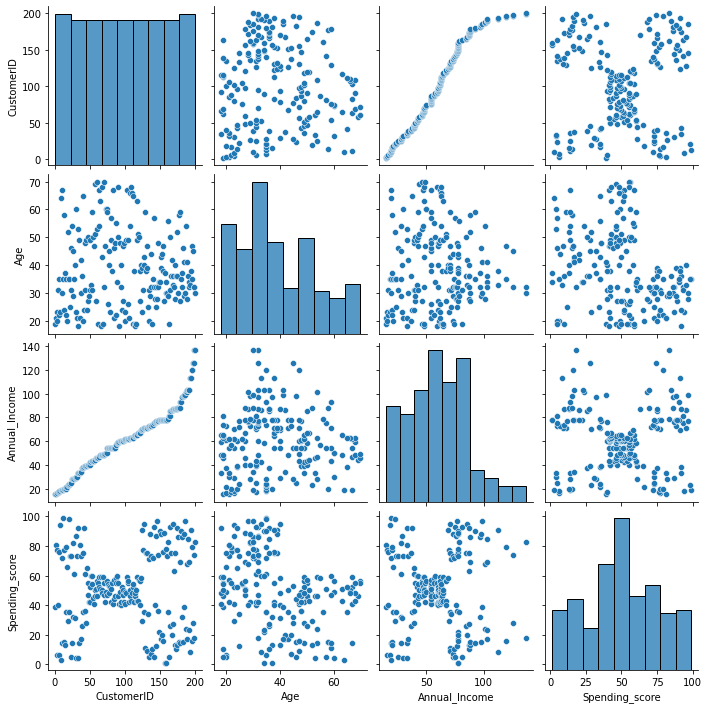

In [64]:
sns.pairplot(dataFrame)

# Targeting on the basis of Spending Score

In [65]:
len(dataFrame[dataFrame['Spending_score']>80])  # For costly products

30

In [66]:
len(dataFrame[(dataFrame['Spending_score']<80) & (dataFrame['Spending_score']>50)]) # Middle price products

67

In [67]:
len(dataFrame[dataFrame['Spending_score']<50])  # For cheap products

98

# Targeting on the basis of Gender
# Count of Male and Female

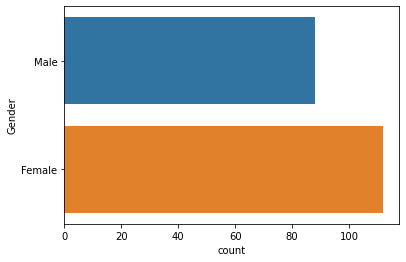

In [68]:
sns.countplot(y='Gender',data=dataFrame)
plt.show()

# Age vs Annual Income w.r.t to Gender

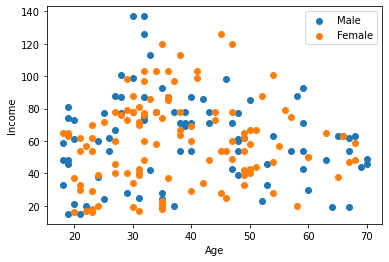

In [69]:
for gender in ['Male','Female']:
    plt.scatter(x='Age',y='Annual_Income',data=dataFrame[dataFrame['Gender']==gender],label=gender)
    
plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()
plt.show()
    

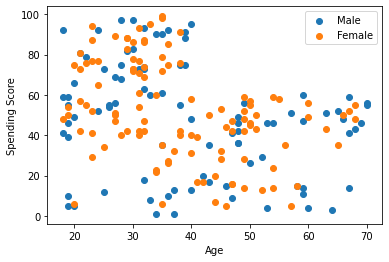

In [70]:
for gender in ['Male','Female']:
    plt.scatter(x='Age',y='Spending_score',data=dataFrame[dataFrame['Gender']==gender],label=gender)
    
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.legend()
plt.show()
    

In [71]:
dataFrame

,CustomerID,Gender,Age,Annual_Income,Spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Scaling data
Our dataset is not scaled some values are much bigger than others,if we will not scale our data our model will not going to perform well.So now we are are going to scale our data for this we are going to use a StandardScaler library
StandardScaler transform the data such the the mean will be 0 and variance will be 1.

Note:- Scaling data is necessary just for the algorithms which is based on the distance like K-means clustering and Hierarchical clustering

# # K-Means Clustering
K-means Clustering is the most popular unsupervised machine learning algorithm.It is a centroid-based or distance-based algorithm.The woking of the alorithms is as follows:

1. First we initialize k points called means randomly
2. Then we categorize each item to its closest mean and we update the mean's coordinates,which are the averages of the items categorized in the mean so far
3. We repeat the process for a given number of iteartions and at the end,we have our clusters

To decide how many number of clusters consider we are going to use a most popular elbow method



In [72]:
dataFrame = dataFrame.iloc[:,2:5]

In [73]:
dataFrame

,Age,Annual_Income,Spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


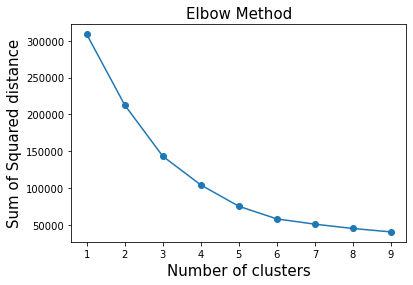

In [74]:
# plot elbow curve

a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(dataFrame)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

In [94]:
k=[]
for i in range(1,11):
    km=(KMeans(n_clusters=i,max_iter=300))
    km.fit(dataFrame)
    inertia.append(km.inertia_)
    

In [95]:
k

[]

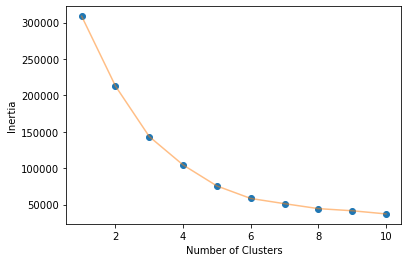

In [75]:
inertia=[]
for i in range(1,11):
    km=(KMeans(n_clusters=i,max_iter=300))
    km.fit(dataFrame)
    inertia.append(km.inertia_)
    
plt.plot(np.arange(1,11),inertia,'o')
plt.plot(np.arange(1,11),inertia,'-',alpha=0.5)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [76]:
#chosing no. of clusters as 3 and refitting kmeans model
kmeans = KMeans(n_clusters = 3,random_state = 111)
kmeans.fit(dataFrame)

KMeans(n_clusters=3, random_state=111)

In [77]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

1    123
0     39
2     38
dtype: int64

In [78]:
# Now we are going to check how our model is,using Silhouette Coefficient

In [79]:
#calculate how good our model is
#calculate Silhouette Coefficient for K=3

metrics.silhouette_score(dataFrame, kmeans.labels_)

0.3839349967742105

# Predictions

In [80]:
#predicting values
cluster_labels = kmeans.fit_predict(dataFrame)

In [81]:
preds = kmeans.labels_
kmeans_df = pd.DataFrame(dataFrame)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(5)

,Age,Annual_Income,Spending_score,KMeans_Clusters
0,19,15,39,1
1,21,15,81,1
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


/Users/ashish/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


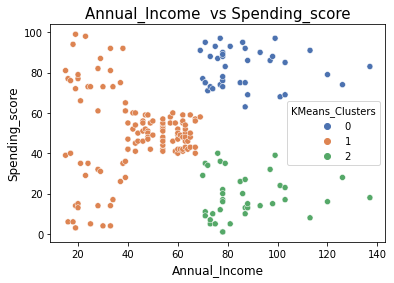

In [82]:
#visulization of clusters  income vs spending score
sns.scatterplot(kmeans_df['Annual_Income'],kmeans_df['Spending_score'],hue='KMeans_Clusters',data=kmeans_df,palette="deep")

# plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
plt.title("Annual_Income  vs Spending_score", fontsize=15)
plt.xlabel("Annual_Income", fontsize=12)
plt.ylabel("Spending_score", fontsize=12)
plt.show()

/Users/ashish/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


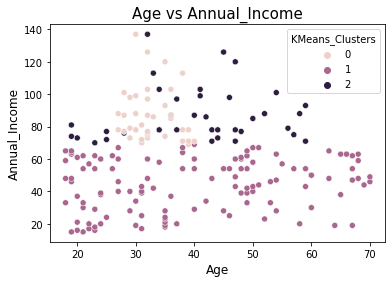

In [78]:
#visulization of clusters inflation vs gdpp
sns.scatterplot(kmeans_df['Age'],kmeans_df['Annual_Income'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("Age vs Annual_Income", fontsize=15)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Annual_Income", fontsize=12)
plt.show()

/Users/ashish/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


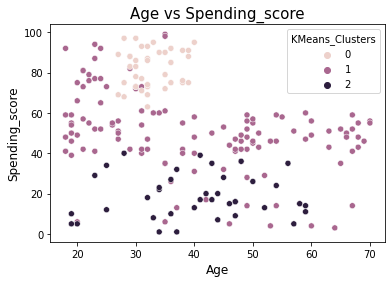

In [79]:
#visulization of clusters inflation vs gdpp
sns.scatterplot(kmeans_df['Age'],kmeans_df['Spending_score'],hue='KMeans_Clusters',data=kmeans_df) 
plt.title("Age vs Spending_score", fontsize=15)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Spending_score", fontsize=12)
plt.show()

In [80]:
#find number of developed country,developing country,under-developed country
Age=kmeans_df[kmeans_df['KMeans_Clusters']==0]['Age']
Annual_Income=kmeans_df[kmeans_df['KMeans_Clusters']==1]['Annual_Income']
Spending_score=kmeans_df[kmeans_df['KMeans_Clusters']==2]['Spending_score']

print("Number of Age",len(Age))
print("Number of Annual_Income",len(Annual_Income))
print("Number of Spending_score",len(Spending_score))

Number of Age 39
Number of Annual_Income 123
Number of Spending_score 38


# Hierarchical Clustering

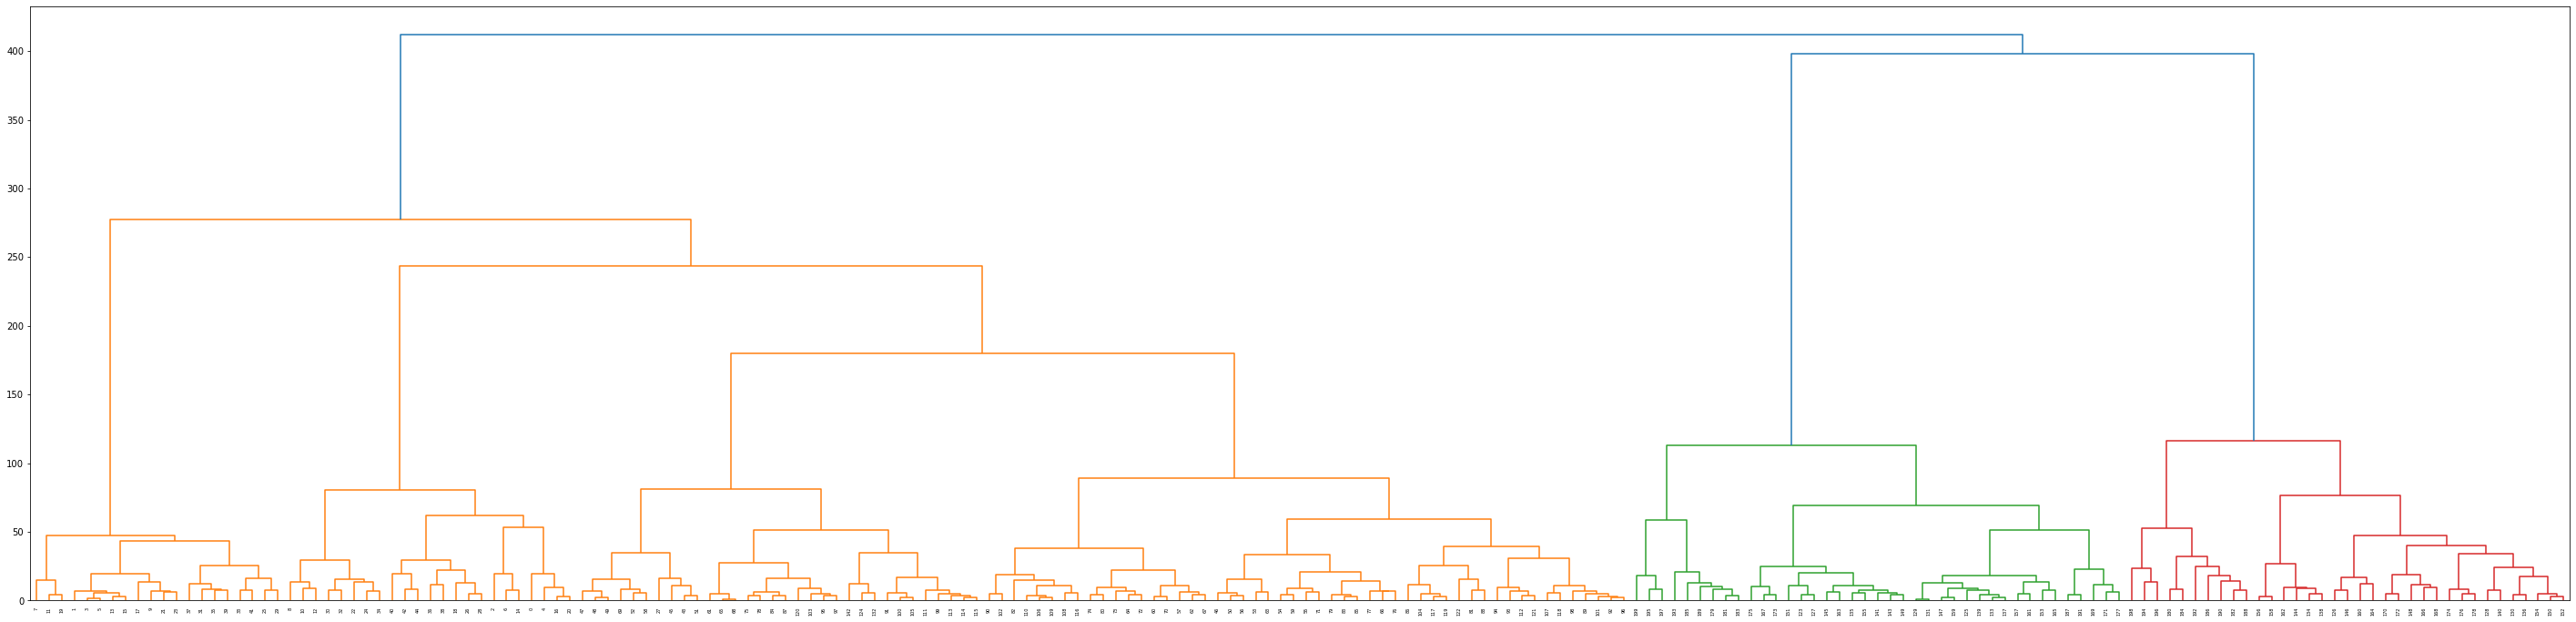

In [81]:
#plotting dendogram
plt.figure(figsize=(50, 12))
dend=hcluster.dendrogram(hcluster.linkage(dataFrame,method='ward'))

In [82]:
# Getting labels from Agglomearative Hierarchical clustering
hcluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
hcluster.fit_predict(dataFrame)
hcluster_label = hcluster.labels_

In [83]:
hcluster_df = pd.DataFrame(dataFrame)
#adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label
#first few rows of hcluster_df
hcluster_df.head()

,Age,Annual_Income,Spending_score,KMeans_Clusters,hcluster
0,19,15,39,1,0
1,21,15,81,1,0
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0


# visulazing hcluster

/Users/ashish/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


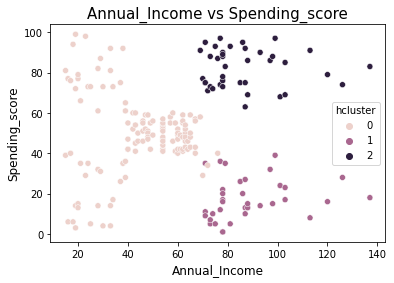

In [84]:
#visulazing hcluster results
#child mortality vs exports 
sns.scatterplot(hcluster_df['Annual_Income'],hcluster_df['Spending_score'],hue='hcluster',data=hcluster_df)
plt.title("Annual_Income vs Spending_score", fontsize=15)
plt.xlabel("Annual_Income", fontsize=12)
plt.ylabel("Spending_score", fontsize=12)
plt.show()


**As we can see the elbow or a knee like bend is at 3.So choosing 3 as a number of clusters**

# Lets give n clusters=4

In [85]:
km=KMeans(n_clusters=4)

In [87]:
km.fit(dataFrame)

KMeans(n_clusters=4)

In [ ]:
X

In [88]:
labels=km.labels_

In [89]:
labels

array([3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [90]:
centroids=km.cluster_centers_

In [91]:
centroids

array([[4.03947368e+01, 8.70000000e+01, 1.86315789e+01, 2.00000000e+00,
        9.21052632e-01],
       [4.48947368e+01, 4.87052632e+01, 4.26315789e+01, 1.00000000e+00,
        5.55111512e-16],
       [3.26923077e+01, 8.65384615e+01, 8.21282051e+01, 2.22044605e-16,
        2.00000000e+00],
       [2.48214286e+01, 2.87142857e+01, 7.42500000e+01, 1.00000000e+00,
        3.33066907e-16]])

In [92]:
dataFrame['Annual_Income'].isna().sum()

0

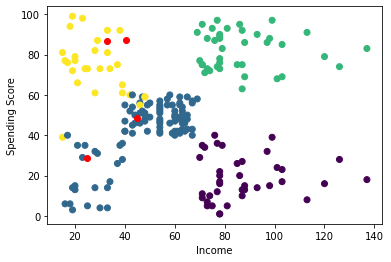

In [93]:
plt.scatter(x='Annual_Income',y='Spending_score',data=dataFrame,c=labels)
plt.scatter(x=centroids[:,0],y=centroids[:,1],c='red')
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()

In [14]:
def user_input_features():
    
    k = st.sidebar.selectbox('Clusters', list(reversed(range(1,11)))
    Annual_Income = st.sidebar.slider('Annual_Income', 15,137,35)
    Spending_score = st.sidebar.slider('Spending_score', 1,99,25)                            

SyntaxError: invalid syntax (<ipython-input-14-59dae9bf3072>, line 4)

In [27]:
def user_input_features():
                                
    k = st.sidebar.selectbox('Clusters', list(reversed(range(1,11)))
    
                         
                                  
    s = st.sidebar.slider('Sepal length', 4.3, 7.9, 5.8)
    sepal_width = st.sidebar.slider('Sepal width', 2.0, 4.4, 3.4)
    petal_length = st.sidebar.slider('Petal length', 1.0, 6.9, 1.3)
    petal_width = st.sidebar.slider('Petal width', 0.1, 2.5, 0.2)
    data = {'sepal_length': sepal_length,
            'sepal_width': sepal_width,
            'petal_length': petal_length,
            'petal_width': petal_width}
    features = pd.DataFrame(data, index=[0])
    return features

SyntaxError: invalid syntax (<ipython-input-27-63278bdf5110>, line 7)

In [100]:
import streamlit as st
Clusters = st.sidebar.slider('k', 1, 10, 5)
def user_input_features():
    #Clusters = st.sidebar.slider('k', 1, 10, 5)
    Annual_Income = st.sidebar.slider('Annual_Income', 15,137,35)
    Spending_score = st.sidebar.slider('Spending_score', 1,99,25)      
    data = {'Clusters': Clusters,
            'Annual_Income': Annual_Income,
            'Spending_score': Spending_score
            }
    features = pd.DataFrame(data, index=[0])
    return features

df = user_input_features()


kmeans = KMeans(n_clusters = Clusters,random_state = 111)
kmeans.fit(dataFrame.iloc[:,2:5])


KMeans(n_clusters=5, random_state=111)